### Libraries Loading

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [116]:
df = pd.read_csv('../data/consolidated_data/all.csv')

### Initial Data Review

In [117]:
df.head(5)

,Unnamed: 0,date,state,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,...,beds_pkrc,admitted_pui_pkrc,admitted_covid_pkrc,admitted_total_pkrc,discharged_pui_pkrc,discharged_covid_pkrc,discharged_total_pkrc,pkrc_covid_pkrc,pkrc_pui_pkrc,pkrc_noncovid_pkrc
0,0,2020-01-25,Johor,4,4,0,4,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020-01-25,Kedah,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020-01-25,Kelantan,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020-01-25,Melaka,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020-01-25,Negeri Sembilan,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
#Small Cleaning
df.drop(columns=['Unnamed: 0'],inplace=True)

In [119]:
df.columns

Index(['date', 'state', 'cases_new', 'cases_import', 'cases_recovered',
       'cases_active', 'cases_cluster', 'cases_unvax', 'cases_pvax',
       'cases_fvax',
       ...
       'beds_pkrc', 'admitted_pui_pkrc', 'admitted_covid_pkrc',
       'admitted_total_pkrc', 'discharged_pui_pkrc', 'discharged_covid_pkrc',
       'discharged_total_pkrc', 'pkrc_covid_pkrc', 'pkrc_pui_pkrc',
       'pkrc_noncovid_pkrc'],
      dtype='object', length=123)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24768 entries, 0 to 24767
Columns: 123 entries, date to pkrc_noncovid_pkrc
dtypes: float64(98), int64(23), object(2)
memory usage: 23.2+ MB


### Dimensionality Reduction

In [121]:
for i in df.columns:
    print(i)

date
state
cases_new
cases_import
cases_recovered
cases_active
cases_cluster
cases_unvax
cases_pvax
cases_fvax
cases_boost
cases_child
cases_adolescent
cases_adult
cases_elderly
cases_0_4
cases_5_11
cases_12_17
cases_18_29
cases_30_39
cases_40_49
cases_50_59
cases_60_69
cases_70_79
cases_80
deaths_new
deaths_bid
deaths_new_dod
deaths_bid_dod
deaths_unvax
deaths_pvax
deaths_fvax
deaths_boost
deaths_tat
rtk-ag_x
pcr_x
rtk-ag_y
pcr_y
daily_partial
daily_full
daily_booster
daily_booster2
daily
daily_partial_adol
daily_full_adol
daily_booster_adol
daily_booster2_adol
daily_partial_child
daily_full_child
daily_booster_child
daily_booster2_child
cumul_partial
cumul_full
cumul_booster
cumul_booster2
cumul
cumul_partial_adol
cumul_full_adol
cumul_booster_adol
cumul_booster2_adol
cumul_partial_child
cumul_full_child
cumul_booster_child
cumul_booster2_child
pfizer1
pfizer2
pfizer3
pfizer4
sinovac1
sinovac2
sinovac3
sinovac4
astra1
astra2
astra3
astra4
sinopharm1
sinopharm2
sinopharm3
sinopharm4
c

### 

In [122]:
df['pcr_x'].equals(df['pcr_y'])

True

In [123]:
df['rtk-ag_x'].equals(df['rtk-ag_y'])

True

In [124]:
#Consolidate Variables 
#Total vaccination doses given out
df['pfizer'] = df['pfizer1']+df['pfizer2']+df['pfizer3']+df['pfizer4']
df['astra'] = df['astra1']+df['astra2']+df['astra3']+df['astra4']
df['sinopharm'] = df['sinopharm1']+df['sinopharm2']+df['sinopharm3']+df['sinopharm4']
df['sinovac'] = df['sinovac1']+df['sinovac2']+df['sinovac3']+df['sinovac4']
df['cansino'] = df['cansino']+df['cansino3']+df['cansino4']

In [125]:
# Drop Columns
df.drop(columns=['cases_cluster',
'cases_unvax','cases_fvax','cases_boost','cases_child','cases_adolescent','cases_adult', 'deaths_new', 'deaths_bid',
'cases_elderly','deaths_unvax','deaths_pvax','deaths_fvax','deaths_boost','deaths_tat','pfizer1',
'pfizer2',
'pfizer3',
'pfizer4',
'sinovac1',
'sinovac2',
'sinovac3',
'sinovac4',
'astra1',
'astra2',
'astra3',
'astra4',
'sinopharm1',
'sinopharm2',
'sinopharm3',
'sinopharm4',
'cansino',
'cansino3',
'cansino4',
'pending1',
'pending2',
'pending3',
'pending4',
'pcr_y',
'rtk-ag_y',
'cumul_full', 'cumul_booster', 'cumul_booster2', 'cumul',
'cumul_partial_adol', 'cumul_full_adol', 'cumul_booster_adol',
'cumul_booster2_adol', 'cumul_partial_child', 'cumul_full_child',
'cumul_booster_child', 'cumul_booster2_child','beds_noncrit_hospital',
'beds_icu_rep','vent_port', 'vent_noncovid','daily_partial_adol','daily_partial_child','daily_full_child','daily_full_adol','daily_booster_adol',
'daily_booster2_adol','daily_booster_child','daily_booster2_child','cumul_partial'
],inplace=True)

In [126]:
df.columns

Index(['date', 'state', 'cases_new', 'cases_import', 'cases_recovered',
       'cases_active', 'cases_pvax', 'cases_0_4', 'cases_5_11', 'cases_12_17',
       'cases_18_29', 'cases_30_39', 'cases_40_49', 'cases_50_59',
       'cases_60_69', 'cases_70_79', 'cases_80', 'deaths_new_dod',
       'deaths_bid_dod', 'rtk-ag_x', 'pcr_x', 'daily_partial', 'daily_full',
       'daily_booster', 'daily_booster2', 'daily', 'beds_hospital',
       'beds_covid_hospital', 'admitted_pui_hospital',
       'admitted_covid_hospital', 'admitted_total_hospital',
       'discharged_pui_hospital', 'discharged_covid_hospital',
       'discharged_total_hospital', 'hosp_covid_hospital', 'hosp_pui_hospital',
       'hosp_noncovid_hospital', 'beds_icu', 'beds_icu_total',
       'beds_icu_covid', 'vent', 'icu_covid', 'icu_pui', 'icu_noncovid',
       'vent_covid', 'vent_pui', 'vent_used', 'vent_port_used', 'beds_pkrc',
       'admitted_pui_pkrc', 'admitted_covid_pkrc', 'admitted_total_pkrc',
       'discharged_pui_p

IDR

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24768 entries, 0 to 24767
Data columns (total 62 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       24768 non-null  object 
 1   state                      24768 non-null  object 
 2   cases_new                  24768 non-null  int64  
 3   cases_import               24768 non-null  int64  
 4   cases_recovered            24768 non-null  int64  
 5   cases_active               24768 non-null  int64  
 6   cases_pvax                 24768 non-null  int64  
 7   cases_0_4                  24768 non-null  int64  
 8   cases_5_11                 24768 non-null  int64  
 9   cases_12_17                24768 non-null  int64  
 10  cases_18_29                24768 non-null  int64  
 11  cases_30_39                24768 non-null  int64  
 12  cases_40_49                24768 non-null  int64  
 13  cases_50_59                24768 non-null  int

In [128]:
df.describe()

,cases_new,cases_import,cases_recovered,cases_active,cases_pvax,cases_0_4,cases_5_11,cases_12_17,cases_18_29,cases_30_39,...,discharged_pui_pkrc,discharged_covid_pkrc,discharged_total_pkrc,pkrc_covid_pkrc,pkrc_pui_pkrc,pkrc_noncovid_pkrc,pfizer,astra,sinopharm,sinovac
count,24768.00000,24768.000000,24768.000000,24768.000000,24768.000000,24768.000000,24768.000000,24768.000000,24768.000000,24768.000000,...,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,18432.000000,18432.000000,18432.000000,18432.000000
mean,213.17244,1.580709,211.336281,2599.339470,17.632833,10.584504,15.471899,13.260053,55.228198,47.721415,...,2.071493,72.374363,74.445855,530.929107,23.163984,14.397660,2444.827203,309.661784,2.403754,1171.467936
std,627.11245,9.378788,633.463726,7190.493069,125.481625,32.940774,48.961621,40.139228,167.551527,145.200836,...,8.561354,148.296442,150.116051,932.410396,84.783623,38.320941,5887.708375,1620.710039,15.868323,5871.001597
min,0.00000,0.000000,0.000000,-630.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-93.000000,0.000000,0.000000,0.000000
25%,2.00000,0.000000,2.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.00000,0.000000,22.000000,491.500000,0.000000,1.000000,1.000000,1.000000,5.000000,5.000000,...,0.000000,17.000000,18.000000,138.000000,0.000000,0.000000,85.000000,0.000000,0.000000,5.000000
75%,152.00000,0.000000,144.000000,2159.000000,1.000000,6.000000,8.000000,7.000000,36.000000,33.000000,...,1.000000,78.000000,81.000000,576.000000,9.000000,0.000000,1698.750000,0.000000,0.000000,89.250000
max,11692.00000,351.000000,12379.000000,103574.000000,3895.000000,593.000000,913.000000,647.000000,3132.000000,2911.000000,...,305.000000,2278.000000,2278.000000,6685.000000,1079.000000,884.000000,58014.000000,31659.000000,415.000000,111830.000000


In [129]:
df.shape

(24768, 62)

In [130]:
#check for duplicate dates
df['date'].nunique()

1548

In [131]:

df

,date,state,cases_new,cases_import,cases_recovered,cases_active,cases_pvax,cases_0_4,cases_5_11,cases_12_17,...,discharged_pui_pkrc,discharged_covid_pkrc,discharged_total_pkrc,pkrc_covid_pkrc,pkrc_pui_pkrc,pkrc_noncovid_pkrc,pfizer,astra,sinopharm,sinovac
0,2020-01-25,Johor,4,4,0,4,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-25,Kedah,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-25,Kelantan,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,Melaka,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-25,Negeri Sembilan,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24763,2024-04-20,Selangor,39,0,8,37,0,0,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.0
24764,2024-04-20,Terengganu,0,0,0,299,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
24765,2024-04-20,W.P. Kuala Lumpur,33,0,5,585,0,2,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.0
24766,2024-04-20,W.P. Labuan,0,0,0,28,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


## Data Cleaning

In [132]:
df.columns

Index(['date', 'state', 'cases_new', 'cases_import', 'cases_recovered',
       'cases_active', 'cases_pvax', 'cases_0_4', 'cases_5_11', 'cases_12_17',
       'cases_18_29', 'cases_30_39', 'cases_40_49', 'cases_50_59',
       'cases_60_69', 'cases_70_79', 'cases_80', 'deaths_new_dod',
       'deaths_bid_dod', 'rtk-ag_x', 'pcr_x', 'daily_partial', 'daily_full',
       'daily_booster', 'daily_booster2', 'daily', 'beds_hospital',
       'beds_covid_hospital', 'admitted_pui_hospital',
       'admitted_covid_hospital', 'admitted_total_hospital',
       'discharged_pui_hospital', 'discharged_covid_hospital',
       'discharged_total_hospital', 'hosp_covid_hospital', 'hosp_pui_hospital',
       'hosp_noncovid_hospital', 'beds_icu', 'beds_icu_total',
       'beds_icu_covid', 'vent', 'icu_covid', 'icu_pui', 'icu_noncovid',
       'vent_covid', 'vent_pui', 'vent_used', 'vent_port_used', 'beds_pkrc',
       'admitted_pui_pkrc', 'admitted_covid_pkrc', 'admitted_total_pkrc',
       'discharged_pui_p

## Initial Preprocessing

Checking for Missing Values

In [133]:
df.isna().sum()

date                      0
state                     0
cases_new                 0
cases_import              0
cases_recovered           0
                      ...  
pkrc_noncovid_pkrc    14767
pfizer                 6336
astra                  6336
sinopharm              6336
sinovac                6336
Length: 62, dtype: int64

In [134]:
null = df.isnull().sum()
for c, v in null.items():
    print(f"{c}: {v}")

date: 0
state: 0
cases_new: 0
cases_import: 0
cases_recovered: 0
cases_active: 0
cases_pvax: 0
cases_0_4: 0
cases_5_11: 0
cases_12_17: 0
cases_18_29: 0
cases_30_39: 0
cases_40_49: 0
cases_50_59: 0
cases_60_69: 0
cases_70_79: 0
cases_80: 0
deaths_new_dod: 832
deaths_bid_dod: 832
rtk-ag_x: 8480
pcr_x: 8480
daily_partial: 6336
daily_full: 6336
daily_booster: 6336
daily_booster2: 6336
daily: 6336
beds_hospital: 1421
beds_covid_hospital: 1421
admitted_pui_hospital: 1421
admitted_covid_hospital: 1421
admitted_total_hospital: 1421
discharged_pui_hospital: 1421
discharged_covid_hospital: 1421
discharged_total_hospital: 1421
hosp_covid_hospital: 1421
hosp_pui_hospital: 1421
hosp_noncovid_hospital: 1421
beds_icu: 1441
beds_icu_total: 1441
beds_icu_covid: 1441
vent: 1441
icu_covid: 1441
icu_pui: 1441
icu_noncovid: 1441
vent_covid: 1441
vent_pui: 1441
vent_used: 1441
vent_port_used: 1441
beds_pkrc: 14767
admitted_pui_pkrc: 14767
admitted_covid_pkrc: 14767
admitted_total_pkrc: 14767
discharged_pui_

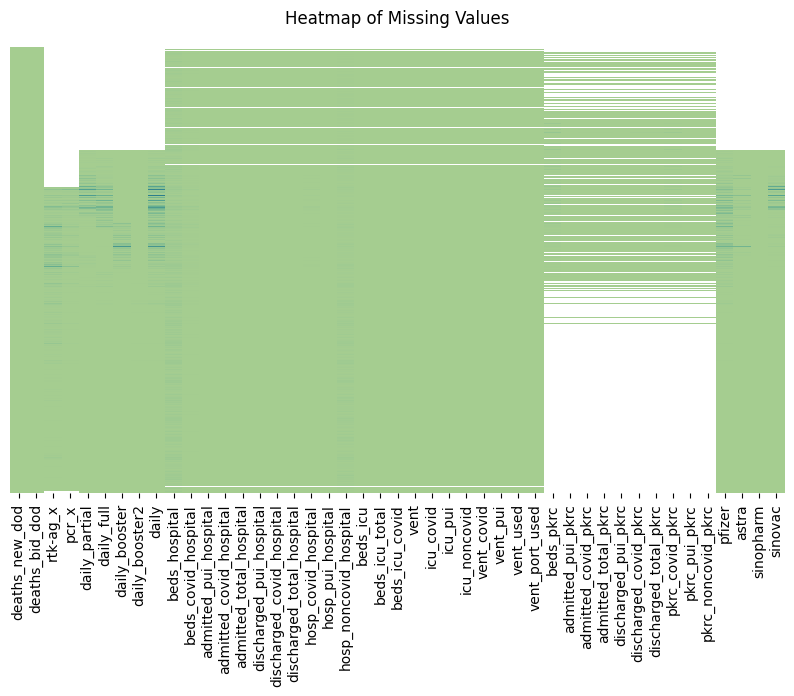

In [135]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[df.columns[df.isna().any()]],cmap="crest",cbar=False,yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

Imputing Missing Values

In [136]:
#Imputing with 0
#As 0 accurately represents the situation
df['deaths_new_dod'] = df['deaths_new_dod'].fillna(0)
df['deaths_bid_dod'] = df['deaths_bid_dod'].fillna(0)
df['rtk-ag_x'] = df['rtk-ag_x'].fillna(0)
df['pcr_x'] = df['pcr_x'].fillna(0)
df['daily_partial'] = df['daily_partial'].fillna(0)
df['daily_full'] = df['daily_full'].fillna(0)
df['daily_booster'] = df['daily_booster'].fillna(0)
df['daily_booster2'] = df['daily_booster2'].fillna(0)
df['daily'] = df['daily'].fillna(0)
df.fillna({'pfizer': 0}, inplace=True)
df.fillna({'astra': 0}, inplace=True)
df.fillna({'sinopharm': 0}, inplace=True)
df.fillna({'sinovac': 0}, inplace=True)

In [138]:
df.columns[df.isna().any()]

Index(['beds_hospital', 'beds_covid_hospital', 'admitted_pui_hospital',
       'admitted_covid_hospital', 'admitted_total_hospital',
       'discharged_pui_hospital', 'discharged_covid_hospital',
       'discharged_total_hospital', 'hosp_covid_hospital', 'hosp_pui_hospital',
       'hosp_noncovid_hospital', 'beds_icu', 'beds_icu_total',
       'beds_icu_covid', 'vent', 'icu_covid', 'icu_pui', 'icu_noncovid',
       'vent_covid', 'vent_pui', 'vent_used', 'vent_port_used', 'beds_pkrc',
       'admitted_pui_pkrc', 'admitted_covid_pkrc', 'admitted_total_pkrc',
       'discharged_pui_pkrc', 'discharged_covid_pkrc', 'discharged_total_pkrc',
       'pkrc_covid_pkrc', 'pkrc_pui_pkrc', 'pkrc_noncovid_pkrc'],
      dtype='object')

#### Imputing Tests

In [ ]:
pkrc_col = ['beds_pkrc',
       'admitted_pui_pkrc', 'admitted_covid_pkrc', 'admitted_total_pkrc',
       'discharged_pui_pkrc', 'discharged_covid_pkrc', 'discharged_total_pkrc',
       'pkrc_covid_pkrc', 'pkrc_pui_pkrc', 'pkrc_noncovid_pkrc']

for columns in pkrc_col:
    print(f'{columns} : {(df[columns].isna().sum()/len(df)) * 100:.2f}%')
    

In [ ]:
df.drop(columns=['beds_pkrc',
       'admitted_pui_pkrc', 'admitted_covid_pkrc', 'admitted_total_pkrc',
       'discharged_pui_pkrc', 'discharged_covid_pkrc', 'discharged_total_pkrc',
       'pkrc_covid_pkrc', 'pkrc_pui_pkrc', 'pkrc_noncovid_pkrc'],inplace=True)

In [146]:
mean_columns  = []
median_columns = []
for column in df.columns[df.isna().any()]:
    skew = df[column].skew()
    if skew <= 2 and skew >= -2 :
        print(f'{column} skewness : {df[column].skew():.2f} : Mean')
        mean_columns.append(column)
    else:
        print(f'{column} skewness : {df[column].skew():.2f} : Median')
        median_columns.append(column)

beds_hospital skewness : 0.50 : Mean
beds_covid_hospital skewness : 2.88 : Median
admitted_pui_hospital skewness : 3.54 : Median
admitted_covid_hospital skewness : 4.76 : Median
admitted_total_hospital skewness : 3.93 : Median
discharged_pui_hospital skewness : 3.29 : Median
discharged_covid_hospital skewness : 5.13 : Median
discharged_total_hospital skewness : 4.27 : Median
hosp_covid_hospital skewness : 5.67 : Median
hosp_pui_hospital skewness : 3.82 : Median
hosp_noncovid_hospital skewness : 0.79 : Mean
beds_icu skewness : 1.15 : Mean
beds_icu_total skewness : 1.36 : Mean
beds_icu_covid skewness : 2.67 : Median
vent skewness : 1.92 : Mean
icu_covid skewness : 5.81 : Median
icu_pui skewness : 19.41 : Median
icu_noncovid skewness : 0.80 : Mean
vent_covid skewness : 6.24 : Median
vent_pui skewness : 17.65 : Median
vent_used skewness : 1.70 : Mean
vent_port_used skewness : 1.78 : Mean


In [150]:
mean_columns

['beds_hospital',
 'hosp_noncovid_hospital',
 'beds_icu',
 'beds_icu_total',
 'vent',
 'icu_noncovid',
 'vent_used',
 'vent_port_used']

In [151]:
median_columns

['beds_covid_hospital',
 'admitted_pui_hospital',
 'admitted_covid_hospital',
 'admitted_total_hospital',
 'discharged_pui_hospital',
 'discharged_covid_hospital',
 'discharged_total_hospital',
 'hosp_covid_hospital',
 'hosp_pui_hospital',
 'beds_icu_covid',
 'icu_covid',
 'icu_pui',
 'vent_covid',
 'vent_pui']

Mean

In [159]:
for column in mean_columns:
    df.fillna({column: df[column].mean()}, inplace=True)

Median

In [155]:
for column in median_columns:
    df.fillna({column: df[column].median()}, inplace=True)

In [160]:
df.isna().sum()

date                         0
state                        0
cases_new                    0
cases_import                 0
cases_recovered              0
cases_active                 0
cases_pvax                   0
cases_0_4                    0
cases_5_11                   0
cases_12_17                  0
cases_18_29                  0
cases_30_39                  0
cases_40_49                  0
cases_50_59                  0
cases_60_69                  0
cases_70_79                  0
cases_80                     0
deaths_new_dod               0
deaths_bid_dod               0
rtk-ag_x                     0
pcr_x                        0
daily_partial                0
daily_full                   0
daily_booster                0
daily_booster2               0
daily                        0
beds_hospital                0
beds_covid_hospital          0
admitted_pui_hospital        0
admitted_covid_hospital      0
admitted_total_hospital      0
discharged_pui_hospital      0
discharg

Check for duplicate indexes

In [171]:
df[df.duplicated(['date','state'])]

,date,state,cases_new,cases_import,cases_recovered,cases_active,cases_pvax,cases_0_4,cases_5_11,cases_12_17,...,icu_pui,icu_noncovid,vent_covid,vent_pui,vent_used,vent_port_used,pfizer,astra,sinopharm,sinovac


### Feature Engineering

In [ ]:
df['date'] = pd.to_datetime(df['date'])